In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from constants import *
import scipy.integrate as intg

## Characterizing delays when variability in higher wavelengths are driven by X-ray reprocessing, for a $10^8 M_{\odot}$ black hole.

In [66]:
def find_quantile(quant):
    return()

def tau(x,A,p,C):
    ff = A*x**p + C
    return ff

def tau1(x,A,C):
    ff = A*x**(4/3) + C
    return ff

def tau2(A,x):
    ff = A*(x**(4/3)-1)
    return(ff)

larr = np.array( [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150])#,500,550,600,650,700,750,800] , dtype=int)
#larr = np.array( [350,400,450,500,550,600,650,700,750,800])

In [71]:
LC = []
t = []
base='lc'
for i in range(larr.size):
    filename = "t10_new_hx5_new_r3by4_lx_func/"+str(i+1)+base+str(larr[i])
    t.append(np.loadtxt(filename,usecols=(0,)))
    lc = np.loadtxt(filename,usecols=(1,))
    LC.append(lc-min(lc)) # remove the static disk contribution
    
txray = np.loadtxt("xray_lc1", usecols=(0,))
fxray = np.loadtxt("xray_lc1", usecols=(2,))

## Smeared out light-curves in response to a X-ray pulse. The corona height is $h_{\rm X} = 10 R_{\rm g}$.

(0.0, 10.0)

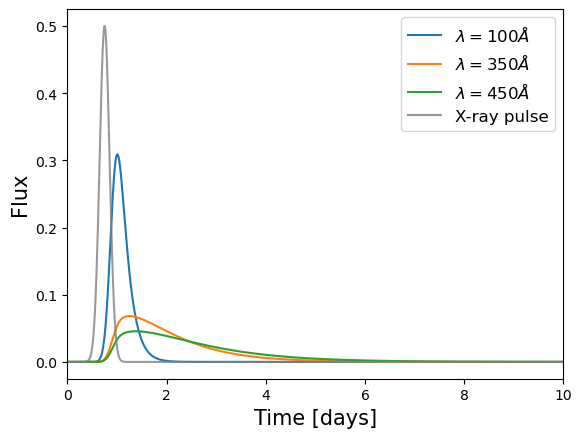

In [85]:
plt.plot(t[0],LC[0], label=r"$\lambda=100\AA$")
plt.plot(t[5],LC[5], label=r"$\lambda=350\AA$")
plt.plot(t[7],LC[7], label=r"$\lambda=450\AA$")
plt.plot(txray, fxray/1e37/4, label="X-ray pulse", color="grey", alpha=0.8)
plt.legend(loc="best", fontsize=12)
plt.xlabel("Time [days]", fontsize=15)
plt.ylabel("Flux", fontsize=15)
plt.xlim(0,10)

## The delay follows the following relation with wavelength: $\tau_{\rm \lambda} = A\lambda^{p} + C$, where p = 1.33. 

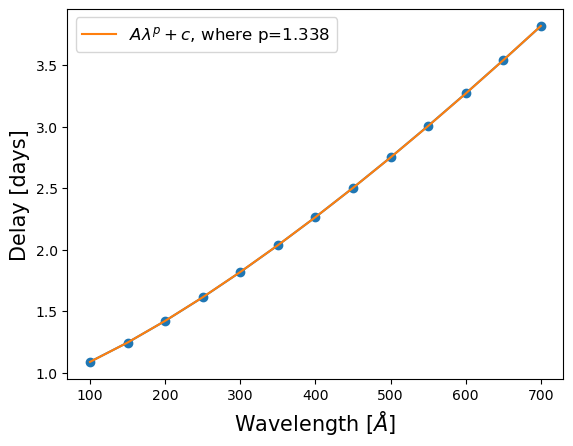

In [84]:
#print("length scale associated with the additive constant =", c*(p1[1]*3600*24)/(Rg/2)/2 ,"Rg")
#%%
tavg = []
for i in range(larr.size):
    f1 = LC[i]
    t1 = t[i]
    dt = t1[1]-t1[0]
    ta0 = intg.simps(t1*f1,dx=dt)/intg.simps(f1,dx=dt)
    tavg.append(ta0)
    
tavg = np.array(tavg)
larr1 = larr[np.where(larr<750.0)[0]]
tavg1 = tavg[np.where(larr<750.0)[0]]


p1 , e1 = curve_fit(tau,larr1,tavg1)
p0 , e0 = curve_fit(tau,larr1,tavg1,p0=[p1[0],1.333,p1[1]])

#plt.plot(larr,tau1(larr,p1[0],p1[1]), label=r"$\tau = A \lambda^{4/3} + c $",color='k')

plt.plot(larr1,tavg1,'-o')
plt.plot(larr1,tau(larr1,p1[0],p1[1],p1[2]), label=r"$A\lambda^{p} + c$, where p="+str(np.round(p1[1],3)))
plt.xlabel(r"Wavelength [$\AA$]", fontsize=15)
plt.ylabel(r"Delay [days]", fontsize=15)
plt.legend(loc="best", fontsize=12)